In [1]:
#importing basic libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

# calculate accuracy measures and confusion matrix
from sklearn import metrics

# ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the data-set
bank_df = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\bank-full.csv")

In [3]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank_df.drop(['duration'], inplace=True, axis=1)

In [6]:
bank_df['day']=bank_df['day'].astype('category')
bank_df['Target']=bank_df['Target'].astype('category')

<Axes: xlabel='age'>

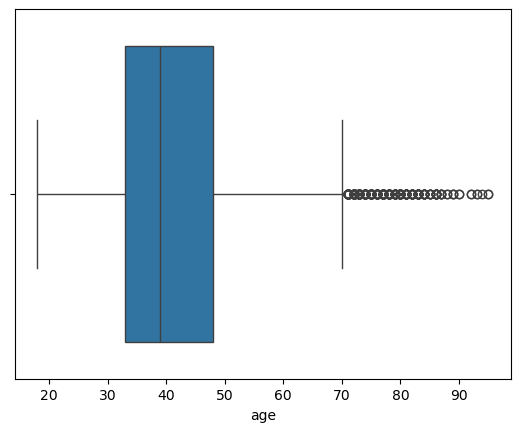

In [7]:
sns.boxplot(x=bank_df['age'], data=bank_df)

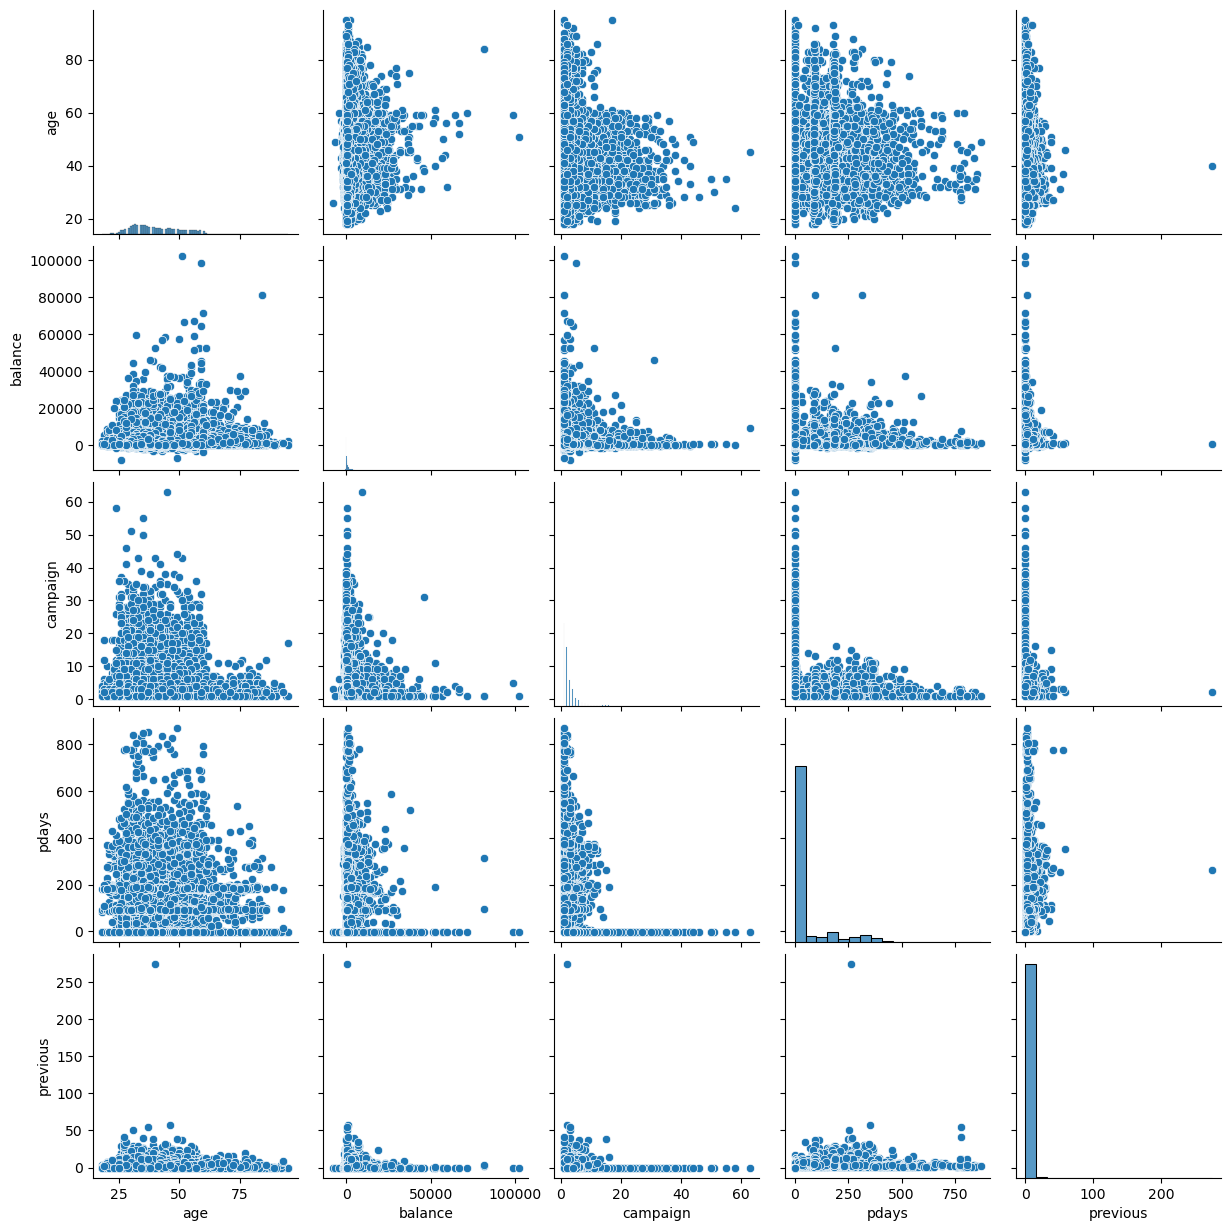

In [8]:
#histograms from the pair plots
sns.pairplot(bank_df)

In [9]:
bank_df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='marital'>

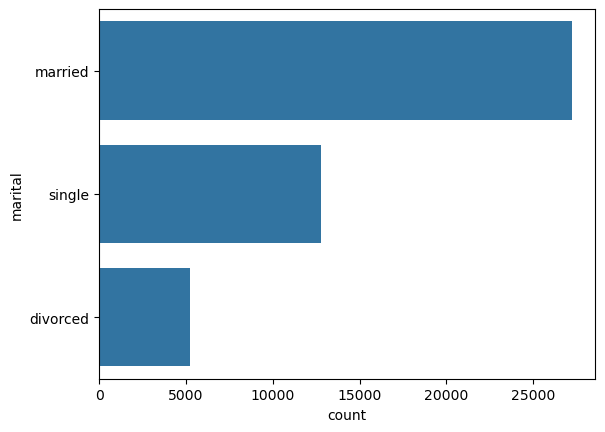

In [10]:
sns.countplot(bank_df['marital'])

<Axes: xlabel='count', ylabel='education'>

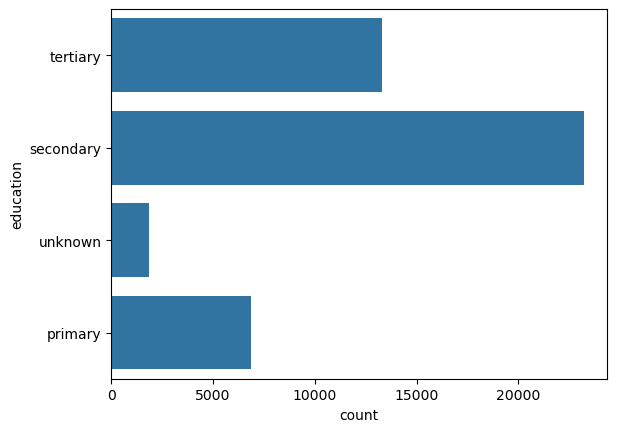

In [11]:
sns.countplot(bank_df['education'])

<Axes: xlabel='count', ylabel='default'>

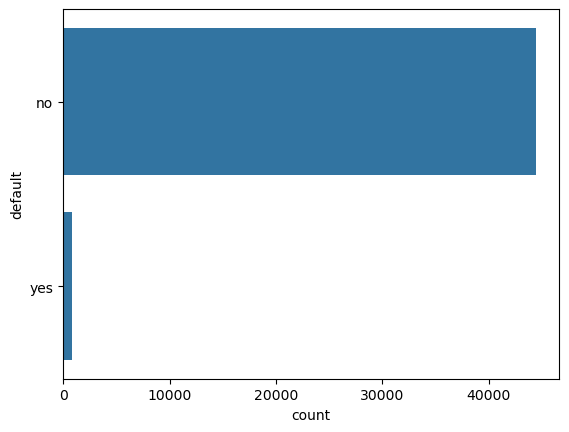

In [12]:
sns.countplot(bank_df['default'])

<Axes: xlabel='count', ylabel='housing'>

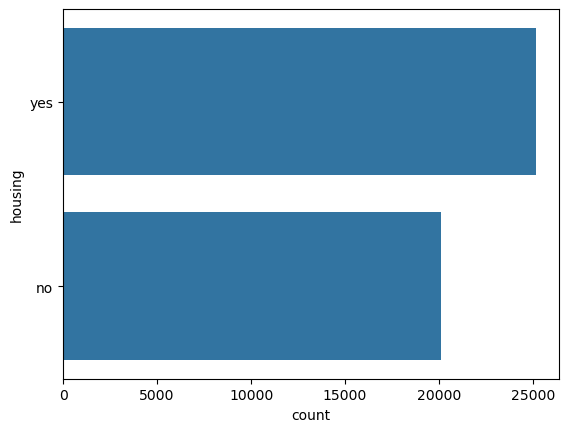

In [13]:
sns.countplot(bank_df['housing'])

<Axes: xlabel='count', ylabel='loan'>

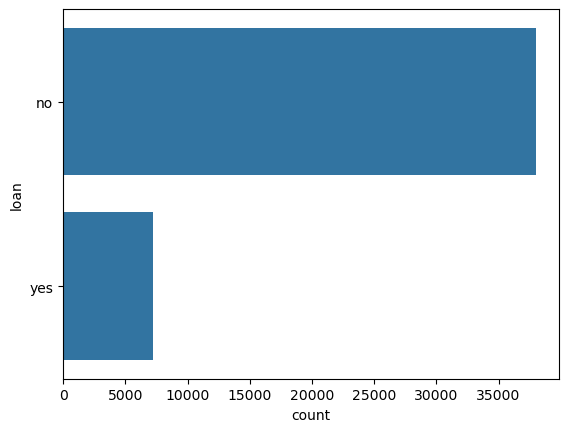

In [14]:
sns.countplot(bank_df['loan'])

<Axes: xlabel='count', ylabel='contact'>

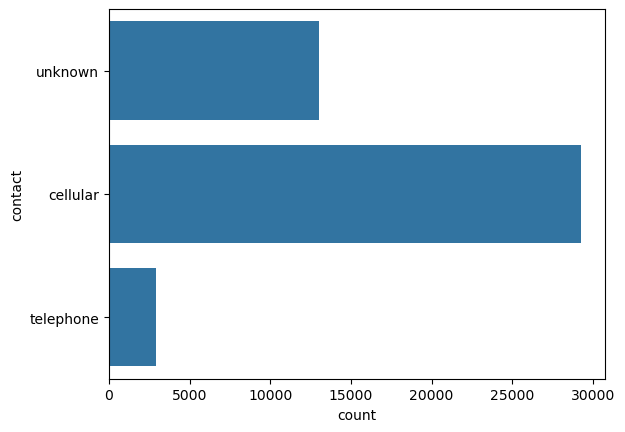

In [15]:
sns.countplot(bank_df['contact'])

<Axes: xlabel='count', ylabel='poutcome'>

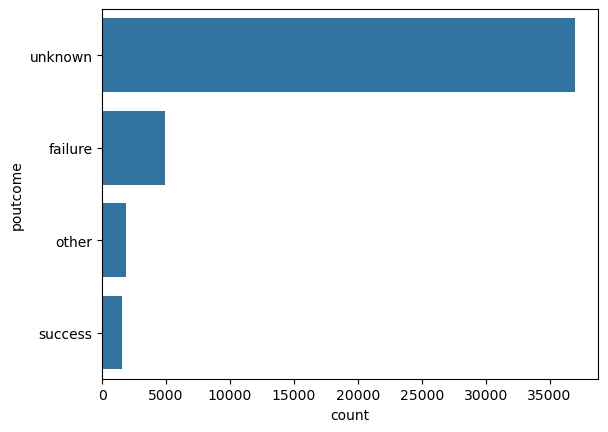

In [16]:
sns.countplot(bank_df['poutcome'])

<Axes: xlabel='count', ylabel='Target'>

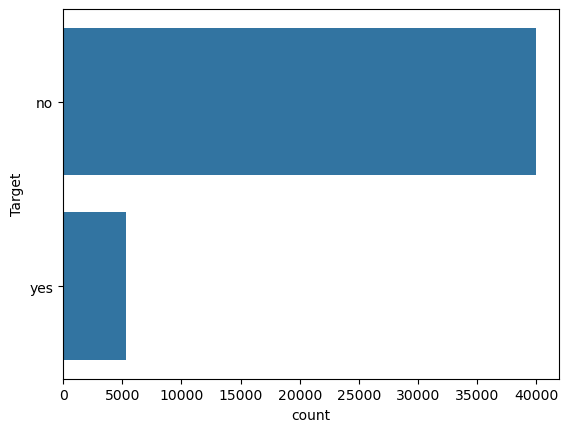

In [17]:
sns.countplot(bank_df['Target'])

In [18]:
bank_df['Target'].value_counts(normalize=True)

Target
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

In [20]:
pd.crosstab(bank_df['job'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
job,,
student,0.713220,0.286780
retired,0.772085,0.227915
unemployed,0.844973,0.155027
management,0.862444,0.137556
admin.,0.877973,0.122027
self-employed,0.881571,0.118429
unknown,0.881944,0.118056
technician,0.889430,0.110570
services,0.911170,0.088830


In [21]:
pd.crosstab(bank_df['marital'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
marital,,
single,0.850508,0.149492
divorced,0.880545,0.119455
married,0.898765,0.101235


In [22]:
pd.crosstab(bank_df['education'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
education,,
tertiary,0.849936,0.150064
unknown,0.864297,0.135703
secondary,0.894406,0.105594
primary,0.913735,0.086265


In [23]:
pd.crosstab(bank_df['education'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
education,,
tertiary,0.849936,0.150064
unknown,0.864297,0.135703
secondary,0.894406,0.105594
primary,0.913735,0.086265


In [24]:
bank_df.drop(['default'], axis=1, inplace=True)


In [25]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome',
       'Target'],
      dtype='object')

In [26]:
pd.crosstab(bank_df['housing'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
housing,,
no,0.832976,0.167024
yes,0.923000,0.077000


In [27]:
pd.crosstab(bank_df['loan'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
loan,,
no,0.873443,0.126557
yes,0.933186,0.066814


In [28]:
pd.crosstab(bank_df['contact'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
contact,,
cellular,0.850811,0.149189
telephone,0.865795,0.134205
unknown,0.959293,0.040707


In [31]:
pd.crosstab(bank_df['month'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
month,,
mar,0.480084,0.519916
dec,0.532710,0.467290
sep,0.535406,0.464594
oct,0.562331,0.437669
apr,0.803206,0.196794
feb,0.833522,0.166478
aug,0.889867,0.110133
jun,0.897772,0.102228
nov,0.898489,0.101511


In [32]:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

In [33]:
cut_points = [0,500,1000, 1500,2000]
labels = ["very low","low","medium","high", "very high", "highest"]
bank_df['balance_range'] = binning(bank_df['balance'], cut_points, labels)
bank_df['balance_range'].value_counts()

balance_range
low          16385
highest       8501
very low      7280
medium        6915
high          3736
very high     2394
Name: count, dtype: int64

In [34]:
cut_points = [2,3,4]
labels = ["<=2","3","4",">4"]
bank_df['campaign_range'] = binning(bank_df['campaign'], cut_points, labels)
bank_df['campaign_range'].value_counts()

campaign_range
<=2    30049
>4      6119
3       5521
4       3522
Name: count, dtype: int64

In [35]:
bank_df.drop(['balance', 'campaign'], axis=1, inplace=True)
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'day', 'month', 'pdays', 'previous', 'poutcome', 'Target',
       'balance_range', 'campaign_range'],
      dtype='object')

In [36]:
X = bank_df.drop("Target" , axis=1)
y = bank_df["Target"]   # select all rows and the 17 th column which is the classification "Yes", "No"
X = pd.get_dummies(X, drop_first=True)

In [37]:
# taking 70:30 training and test set
test_size = 0.30

# Random numbmer seeding for reapeatability of the code
seed = 7

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [38]:
X_train.shape,X_test.shape

((31647, 75), (13564, 75))

In [39]:
#instantiating decision tree as the default model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
# Is the model an overfit model? 
y_pred = dt_model.predict(X_test)
print(dt_model.score(X_train, y_train))
print(dt_model.score(X_test , y_test))

0.9987360571302177
0.8373636095547037


In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score

print(confusion_matrix(y_test, y_pred))

print(accuracy_score(y_test, y_pred))


print(recall_score(y_test, y_pred,average="binary", pos_label="yes"))

[[10859  1171]
 [ 1035   499]]
0.8373636095547037
0.32529335071707954


In [42]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [43]:
!pip install pydotplus

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24576 sha256=30db4f30947b689be368fa27da7de129391f9a459e91d98a1a554f094d57d751
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\77\54\7c\c8077b6151c819495492300386cf9b151a954259d1a658c63b
Successfully built pydotplus


In [46]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
import six
import sys
from io import StringIO
sys.modules['sklearn.externals.six'] = six

feature_cols = X_train.columns
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  


In [47]:
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)[0:10] #Top 10 features

,0
poutcome_success,0.652601
contact_unknown,0.202537
housing_yes,0.121260
month_oct,0.014702
month_sep,0.005419
pdays,0.003482
day_23,0.000000
day_24,0.000000
day_25,0.000000
day_26,0.000000


In [48]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [49]:
acc_DT = accuracy_score(y_test, preds_pruned)
recall_DT = recall_score(y_test, preds_pruned, average="binary", pos_label="yes")

In [50]:
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT, 'recall': recall_DT})
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf

,Method,accuracy,recall
0,Decision Tree,0.893689,0.134941


In [51]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)


In [52]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)
recall_RF = recall_score(y_test, pred_RF, average="binary", pos_label="yes")

In [53]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF], 'recall': [recall_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf


,Method,accuracy,recall
0,Decision Tree,0.893689,0.134941
0,Random Forest,0.887865,0.208605


In [54]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 200, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [55]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)
recall_AB = recall_score(y_test, pred_AB, pos_label='yes')

In [56]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB], 'recall':[recall_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf
resultsDf

,Method,accuracy,recall
0,Decision Tree,0.893689,0.134941
0,Random Forest,0.887865,0.208605
0,Adaboost,0.893689,0.151890


In [57]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=100, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [58]:
pred_BG =bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)
recall_BG = recall_score(y_test, pred_BG, pos_label='yes')

In [59]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG], 'recall':[recall_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf
resultsDf


,Method,accuracy,recall
0,Decision Tree,0.893689,0.134941
0,Random Forest,0.887865,0.208605
0,Adaboost,0.893689,0.151890
0,Bagging,0.889487,0.239896


In [60]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [61]:
pred_GB =gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)
recall_GB = recall_score(y_test, pred_GB, pos_label='yes')

In [62]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB], 'recall':[recall_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf
resultsDf

,Method,accuracy,recall
0,Decision Tree,0.893689,0.134941
0,Random Forest,0.887865,0.208605
0,Adaboost,0.893689,0.151890
0,Bagging,0.889487,0.239896
0,Gradient Boost,0.894279,0.212516
